# Part 3: Peer-to-peer Message Behaviour Data Analysis

---

### Install Python packages (pip only)

In [1]:
#e.g., %pip install some-package
%pip install networkx
%pip install matplotlib
%pip install numpy
%pip install scipy
%pip install pandas
%pip install operator
%pip install ndlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement operator (from versions: none)
ERROR: No matching distribution found for operator


Note: you may need to restart the kernel to use updated packages.


### Import Python packages

In [2]:
#e.g., import some-package
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import operator
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
%matplotlib inline 

no display found. Using non-interactive Agg backend


---

### Task 1 of 2

Examine the file "p2p_msg_cmt224.csv" which represents messaging behaviour between users on a messaging platform. Each row has four columns, representing a single event where a person (person_a) messaged another person (person_b) on some date (date) at some time of day (time). From this, answer the following questions:

##### Q1. Build a suitable network to represent social connections based on the messaging behaviour that took place in the first 28 days. In doing so, assume that one or more messages from one person to another represents a mutual underlying social connection (i.e., regardless of whether person_a messaged person_b, person_b messaged person_a, or both at some point). 

    person_a  person_b        date      time            datetime
0         29        25  21/04/2004  00:34:43 2004-04-21 00:34:43
1         30        31  21/04/2004  04:18:26 2004-04-21 04:18:26
2         30        31  21/04/2004  04:18:31 2004-04-21 04:18:31
3         30        31  21/04/2004  04:18:33 2004-04-21 04:18:33
4         30        31  21/04/2004  04:18:36 2004-04-21 04:18:36
5         32        33  21/04/2004  04:27:03 2004-04-21 04:27:03
6         34        35  21/04/2004  06:32:10 2004-04-21 06:32:10
7         34        33  21/04/2004  06:35:18 2004-04-21 06:35:18
8         36        37  21/04/2004  08:02:29 2004-04-21 08:02:29
9         38        39  21/04/2004  10:14:09 2004-04-21 10:14:09
10        36        40  21/04/2004  10:25:57 2004-04-21 10:25:57
11        41        15  21/04/2004  10:38:25 2004-04-21 10:38:25
12        41        11  21/04/2004  10:39:14 2004-04-21 10:39:14
13        41        14  21/04/2004  10:41:02 2004-04-21 10:41:02
14        41        13  2

C:\Users\Winn_\AppData\Local\Temp\ipykernel_9656\171080766.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])


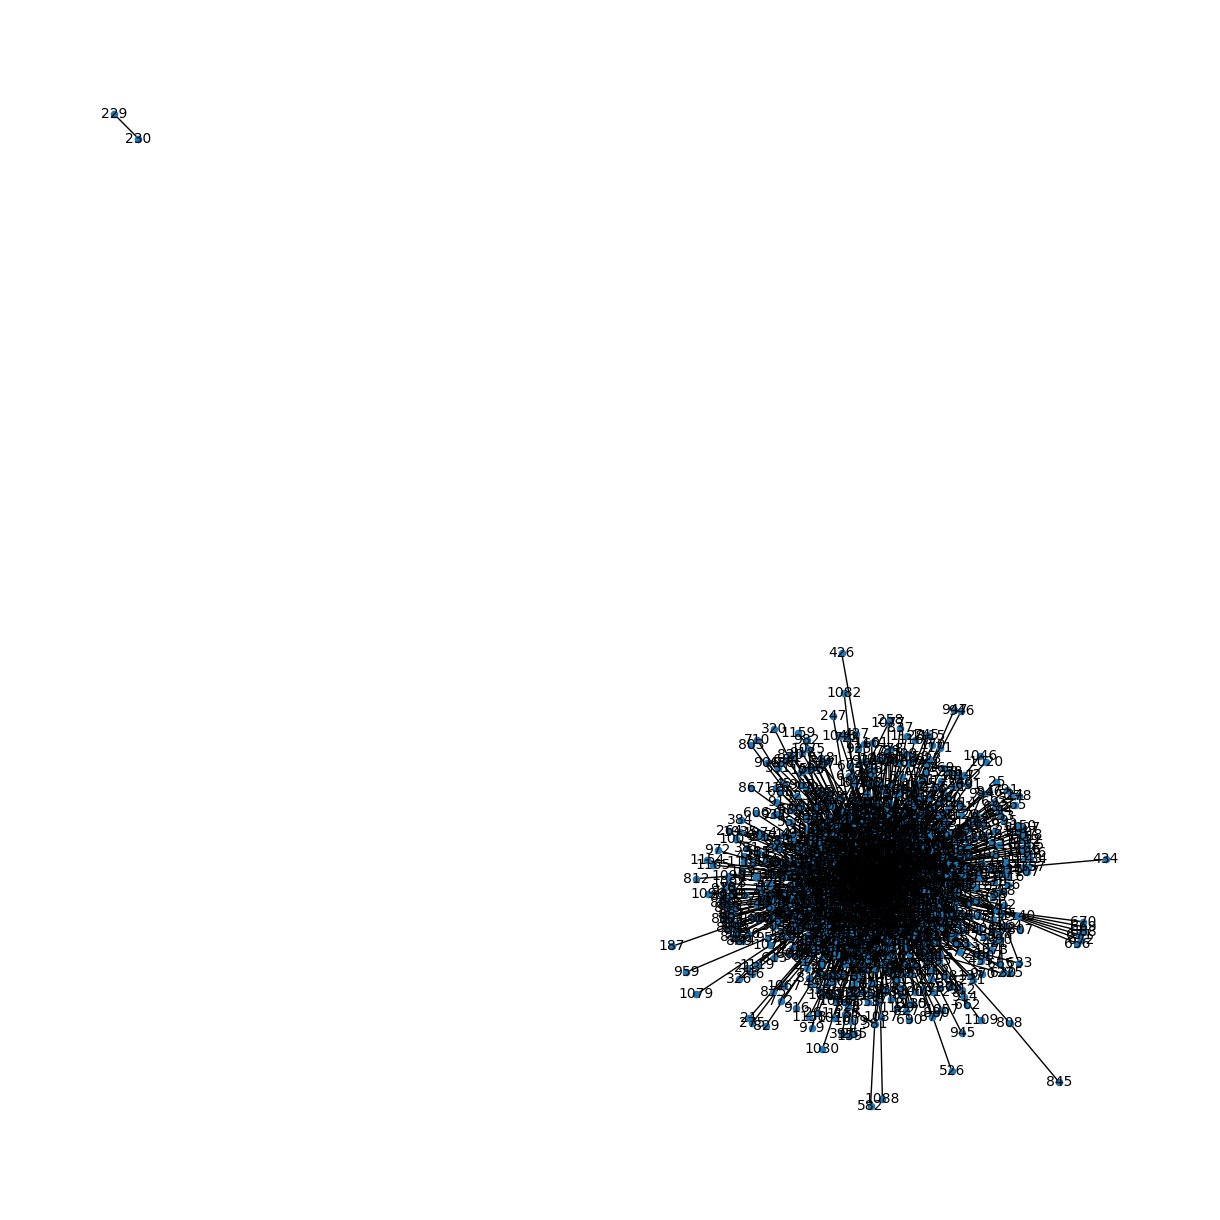

In [3]:
#CODE:
# 1 ËØªÂèñÊñá‰ª∂Âπ∂Â≠òÂÇ®‰ø°ÊÅØ
data_path = 'p2p_msg_cmt224.csv'
data = pd.read_csv(data_path)
# 2 ÈÄöËøáÊó∂Èó¥ÂíåÊó•ÊúüËøõË°åÊéíÂ∫è
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
data.sort_values('datetime', inplace=True)
print(data.head(20))
# 3 Ëé∑ÂèñÊúÄÂ∞èÁöÑÊó∂Èó¥ÂíåÊó•Êúü‰Ωú‰∏∫Ëµ∑ÂßãÁÇπÔºåËé∑Âèñ28Â§©ÂÜÖÁöÑÊâÄÊúâÊï∞ÊçÆ
start = data['datetime'].min()
end = start + pd.Timedelta(days=28)
data_in_range = data[(data['datetime'] >= start) & (data['datetime'] < end)]
print(len(data_in_range))
print(data_in_range.iloc[-1])
# 4 Â∞ÜËøô‰∫õÂú®28Â§©ËåÉÂõ¥ÂÜÖÁöÑÊï∞ÊçÆÂª∫Á´ãÊó†ÂêëÂõæ
G = nx.from_pandas_edgelist(data_in_range, 'person_a', 'person_b', create_using=nx.Graph())
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# 5 ÂèØËßÜÂåñÁΩëÁªú
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=20, font_size=10)
plt.show()

##### Q2. Using the largest connected component of the network constructed in Task 1, Q1. What is the mean, median and the standard deviation of the differences between the maximum degree of separation of each individual and the average distance between the individual and all others?

In [4]:
#CODE:
# 1 ËÆ°ÁÆóÂõæÁöÑÊúÄÂ§ßËøûÈÄöÁªÑ‰ª∂,Âπ∂Âª∫Á´ãÂ≠êÂõæ
largest_connected_component = max(nx.connected_components(G), key=len)
lcc_subgraph = G.subgraph(largest_connected_component)
# 2 ÂØπ‰∫éÊØè‰∏™ËäÇÁÇπ
# (1) ÊúÄÂ§ßÂàÜÁ¶ªÂ∫¶ÔºöËÆ°ÁÆóËØ•ËäÇÁÇπÂà∞ÊúÄËøúËäÇÁÇπÁöÑÊúÄÁü≠Ë∑ØÂæÑÈïøÂ∫¶
# (2) Âπ≥ÂùáË∑ùÁ¶ªÔºöËÆ°ÁÆóËØ•ËäÇÁÇπÁöÑÂπ≥ÂùáË∑ØÂæÑÈïøÂ∫¶ÔºöËØ•ËäÇÁÇπÂà∞ÂÖ∂‰ªñÊâÄÊúâËäÇÁÇπÁöÑÂπ≥ÂùáË∑ØÂæÑÈïøÂ∫¶
# (3) ËÆ°ÁÆóÂ∑ÆÂÄºÔºåÂ≠òÂà∞ÂàóË°®
differences = []
for node in lcc_subgraph.nodes():
    # ËÆ°ÁÆóËØ•ËäÇÁÇπÂà∞ÊâÄÊúâËäÇÁÇπÁöÑÊúÄÁü≠Ë∑ØÂæÑÈïøÂ∫¶
    all_path_length = nx.single_source_shortest_path_length(lcc_subgraph, node)
    path_length_list = list(all_path_length.values())
    if all_path_length:
        max_sparation = np.max(path_length_list)
        average_distance = np.mean(path_length_list)
        differences.append(np.abs(max_sparation - average_distance))
# 3 ËÆ°ÁÆóÂàóË°®‰∏≠ÊâÄÊúâÊï∞ÊçÆÁöÑÂùáÂÄº„ÄÅ‰∏≠‰ΩçÊï∞„ÄÅÊ†áÂáÜÂ∑Æ
mean_difference = np.mean(differences)
median_difference = np.median(differences)
std_difference = np.std(differences)
print(f"The mean of difference: {mean_difference:.2f}")
print(f"The median of difference: {median_difference:.2f}")
print(f"The standard deviation of difference: {std_difference:.2f}")

The mean of difference: 2.24
The median of difference: 2.23
The standard deviation of difference: 0.40


##### Q3. Build another suitable network to represent social connections based on ALL message behaviour in the dataset. In doing so, assume that one or messages from one person to another represents a MUTUAL underlying social connection (i.e., regardless of whether person_a messaged person_b, person_b messaged person_a, or both at some point).Can the social phenomenon, ‚ÄòTriadic Closure‚Äô, be supported for the common nodes that exist in both the network created from behaviour for the first 28 days (i.e., from Task 1, Q1) and the network built from all message behaviour?

In [5]:
#CODE:
# ÂÅáËÆæÂàóÂêç‰∏∫ 'person_a' Âíå 'person_b'ÔºåËã•‰∏çÊòØËØ∑Ê†πÊçÆ‰∏äÈù¢ÁöÑËæìÂá∫ËøõË°å‰øÆÊîπ
# ÊûÑÂª∫ÂÖ®Êï∞ÊçÆÈõÜÁöÑÁΩëÁªú
G_full = nx.from_pandas_edgelist(data, 'person_a', 'person_b', create_using=nx.Graph())

# ÂÅáËÆæGÊòØ‰πãÂâçÊûÑÂª∫ÁöÑÂü∫‰∫éÈ¶ñ28Â§©ÁöÑÁΩëÁªú
# ÊâæÂá∫‰∏§‰∏™ÁΩëÁªúÂÖ±ÊúâÁöÑËäÇÁÇπ
common_nodes = set(G.nodes()).intersection(set(G_full.nodes()))

# ÂØπÂÖ±ÊúâËäÇÁÇπÂàõÂª∫Â≠êÂõæ
subgraph_28 = G.subgraph(common_nodes)
subgraph_full = G_full.subgraph(common_nodes)

# ËÆ°ÁÆó‰∏âÂÖÉÈó≠ÂåÖÁ≥ªÊï∞
triadic_closure_28 = nx.transitivity(subgraph_28)
triadic_closure_full = nx.transitivity(subgraph_full)

# ËæìÂá∫‰∏âÂÖÉÈó≠ÂåÖÁ≥ªÊï∞
print(f"È¶ñ28Â§©ÁΩëÁªúÁöÑ‰∏âÂÖÉÈó≠ÂåÖÁ≥ªÊï∞: {triadic_closure_28:.2f}")
print(f"ÂÆåÊï¥Êï∞ÊçÆÈõÜÁΩëÁªúÁöÑ‰∏âÂÖÉÈó≠ÂåÖÁ≥ªÊï∞: {triadic_closure_full:.2f}")

È¶ñ28Â§©ÁΩëÁªúÁöÑ‰∏âÂÖÉÈó≠ÂåÖÁ≥ªÊï∞: 0.05
ÂÆåÊï¥Êï∞ÊçÆÈõÜÁΩëÁªúÁöÑ‰∏âÂÖÉÈó≠ÂåÖÁ≥ªÊï∞: 0.07


##### Q4. What hypothetical, non-existent edges would need to be added to the network representing all message behaviour (i.e., from Task 1, Q3) such that a message could pass along a path from any node to any other? In doing so, aim to minimise the number of edges that would be needed as well as the longest shortest path in the network as a result.

In [6]:
#CODE:
"""
all_cc = list(nx.connected_components(G_full))
# Ë¥™ÂøÉÁÆóÊ≥ïËøûÊé•ÊâÄÊúâËøûÈÄöÂàÜÈáèËØïÂõæÂæóÂà∞ÊúÄÂ∞èÁõ¥ÂæÑÁöÑÂõæ
# Áõ¥Âà∞Âè™Ââ©‰∏Ä‰∏™ËøûÈÄöÂàÜÈáè‰πüÂ∞±ÊòØÊï¥‰∏™ÂõæÂÖ®ËøûÈÄöÂêéÂÅúÊ≠¢
while len(all_cc) > 1:
    best_edges = (-1, -1)
    the_longest_shortest_path = float('inf')
    for i in range(len(all_cc)):
        for j in range(i + 1, len(all_cc)):
            # Âª∫Á´ãÊµãËØïÂõæ
            test_graph = nx.Graph(G_full)
            # ËøûÊé•ËæπÊù•ÊµãËØï
            test_graph.add_edge(next(iter(all_cc[i])), next(iter(all_cc[j])))
            # ËÆ°ÁÆóËøûÊé•ËØ•ËæπÂêéÂõæÁöÑÊúÄÂ§ßËøûÈÄöÁªÑ‰ª∂ÁöÑÊúÄÈïøÊúÄÁü≠Ë∑ØÂæÑ
            lcc = max(nx.connected_components(test_graph), key=len)
            # Âª∫Á´ãÊúÄÂ§ßËøûÈÄöÁªÑ‰ª∂ÁöÑÂ≠êÂõæ
            subgraph = test_graph.subgraph(lcc)
            # Ê±ÇÂ≠êÂõæÁõ¥ÂæÑ
            test_longest_shortest_path = nx.diameter(subgraph)
            # Ë¥™ÂøÉ
            if test_longest_shortest_path < the_longest_shortest_path:
                the_longest_shortest_path = test_longest_shortest_path
                best_edges = (i, j)
    # ËøûÊé•Áõ¥ÂæÑÊúÄÂ∞èÂåñÁöÑ‰∏§‰∏™ËøûÈÄöÂàÜÈáè
    i, j = best_edges
    G_full.add_edge(next(iter(all_cc[i])), next(iter(all_cc[j])))
    new_component = all_cc[i].union(all_cc[j])
    all_cc = [c for k, c in enumerate(all_cc) if k not in (i, j)]
    all_cc.append(new_component)
# ËÆ°ÁÆó‰ºòÂåñÂêéÁöÑÁΩëÁªúÁõ¥ÂæÑ
if nx.is_connected(G_full):
    print("New diameter:", nx.diameter(G_full))
else:
    print("Graph is still not connected.")
"""
components = list(nx.connected_components(G_full))
subgraphs = [G_full.subgraph(c).copy() for c in components]

# ËÆ°ÁÆóÊØè‰∏™Â≠êÂõæÁöÑÂ§ö‰∏™‰∏≠ÂøÉÊÄßÊåáÊ†á
centrality_measures = []
for sg in subgraphs:
    centrality = {}
    centrality['betweenness'] = nx.betweenness_centrality(sg)
    centrality['closeness'] = nx.closeness_centrality(sg)
    centrality['degree_centrality'] = nx.degree_centrality(sg)
    centrality_measures.append(centrality)

# ÈÄâÊã©ÊØè‰∏™ËøûÈÄöÂàÜÈáèÁöÑ‰ª£Ë°®ËäÇÁÇπ
rep_nodes = []
for idx, sg in enumerate(subgraphs):
    # ÁªºÂêàËÄÉËôëÂ§ö‰∏™‰∏≠ÂøÉÊÄßÊåáÊ†á
    combined_score = {node: centrality_measures[idx]['betweenness'][node] * 0.4 +
                             centrality_measures[idx]['closeness'][node] * 0.3 +
                             centrality_measures[idx]['degree_centrality'][node] * 0.3
                      for node in sg.nodes()}
    # ÈÄâÊã©ÁªºÂêàÂæóÂàÜÊúÄÈ´òÁöÑËäÇÁÇπ
    best_node = max(combined_score, key=combined_score.get)
    rep_nodes.append(best_node)

# ËøûÊé•Ëøô‰∫õ‰ª£Ë°®ËäÇÁÇπ
new_edges = [(rep_nodes[i], rep_nodes[i+1]) for i in range(len(rep_nodes)-1)]
G_full.add_edges_from(new_edges)
print(new_edges)

# Ê£ÄÊü•Êñ∞ÂõæÁöÑËøûÈÄöÊÄßÂíåÂ∞ùËØïËÆ°ÁÆóÊñ∞ÁöÑÁõ¥ÂæÑ
if nx.is_connected(G_full):
    print("New diameter after connecting components:", nx.diameter(G_full))
else:
    print("Still not fully connected.")

[(105, 229), (229, 1258), (1258, 1192), (1192, 1797), (1797, 1812)]
New diameter after connecting components: 10


### Task 2 of 2 

Using the largest connected component of the network constructed from all data in Task 1, Q2, assume the role of an outsider with complete visibility of the network that now wishes to spread a hypothetical message such that everyone in the component would know the information it contained as quickly as possible. Assume that messages will now spread in sequential timesteps using the following mechanism. If an individual is told the message at timestep ùë°, the individual will forward the message to all of their direct connections at timestep ùë°+1. Individuals can therefore be told the message more than once. From this, answer the following questions:

##### Q1. If you could only select 1 individual to tell at timestep 0, what set of nodes could you select from which would result in the message being received by everyone in the fewest timesteps as possible and what would the number of timesteps be?

Node: 400   Degree Centrality: 0.18
Node: 103   Degree Centrality: 0.17
Node: 41   Degree Centrality: 0.12
Node: 194   Degree Centrality: 0.11
Node: 9   Degree Centrality: 0.11
Node: 638   Degree Centrality: 0.10
Node: 321   Degree Centrality: 0.10
Node: 105   Degree Centrality: 0.10
Node: 32   Degree Centrality: 0.09
Node: 713   Degree Centrality: 0.08


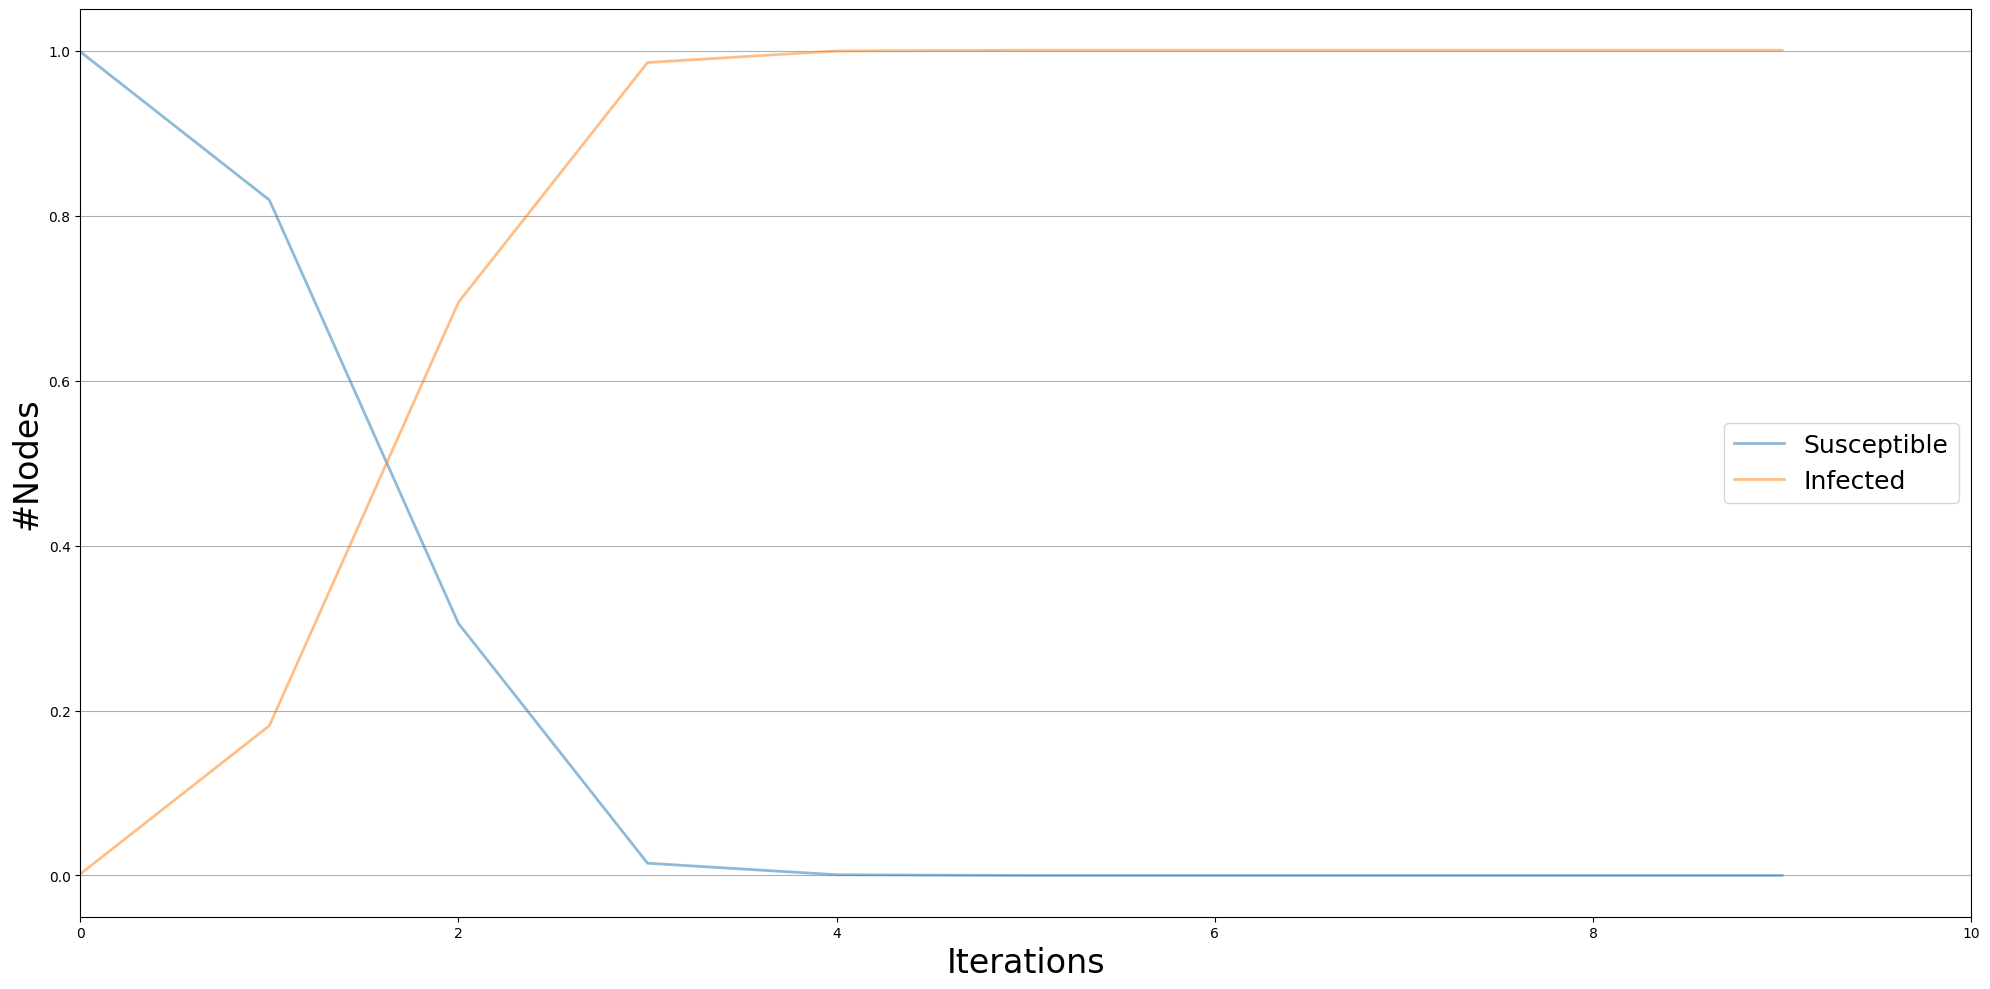

Iteration: 0    Number infected: 2    (0.0017467248908296944)
Iteration: 1    Number infected: 208    (0.18165938864628822)
Iteration: 2    Number infected: 796    (0.6951965065502184)
Iteration: 3    Number infected: 1129    (0.9860262008733625)
Iteration: 4    Number infected: 1145    (1.0)
Threshold met = True after 4 iterations from the initial iteration


In [7]:
#CODE:
# ÈÄâÂá∫‰∏Ä‰∏™ËäÇÁÇπÔºå‰ΩøÂæó‰ªéËØ•ËäÇÁÇπ‰º†Êí≠ÔºåÊúÄÁü≠Êó∂Èó¥‰º†Êí≠Âà∞ÁΩëÁªú‰∏≠ÁöÑÊâÄÊúâ‰∫∫
# ÈÄâÂàùÂßãÁÇπÊåáÊ†áÔºåÁ¥ßÂØÜ‰∏≠ÂøÉÊÄßÔºåÂª∫Á´ãÁ¥ßÂØÜ‰∏≠ÂøÉÊÄß‰ªéÂ§ßÂà∞Â∞èÂ∫èÂàó
closeness_centrality = sorted(
    [(node[0], node[1]) for node in nx.closeness_centrality(lcc_subgraph).items()], 
    key=operator.itemgetter(1), 
    reverse=True
)
# ËæìÂá∫Ââç‰∫î‰∏™
for node, centrality in closeness_centrality[:10]:
    print(f"Node: {node}   Closeness Centrality: {centrality}")

# ÂáΩÊï∞Ôºö‰º†Êí≠Ê®°Âûã
def runSIModelOnANetwork(G, rate, iterations, initial_infected=None, fraction_infected=None, model_seed=1):
    # ‰º†Êí≠Ê®°Âûã
    model = ep.SIModel(G, seed=model_seed)

    # ÈÖçÁΩÆÊ®°Âûã
    # ÂàõÂª∫Ê®°ÂûãÈÖçÁΩÆÈ°π
    model_configuration = mc.Configuration()
    # ËÆæÁΩÆ‰∏Ä‰∏™ËäÇÁÇπÂ∞Ü‰ø°ÊÅØÂëäÁü•ÂÖ∂ËøûÊé•/ÈÇªÂ±ÖÁöÑÂá†Áéá
    model_configuration.add_model_parameter('beta', rate) # Probability between 0..1 (0..100%)
    # ÂØπÊ®°ÂûãÊâßË°ånÊ¨°Ëø≠‰ª£Êù•Ê®°Êãü‰º†Êí≠ÔºåÂπ∂Â≠òÂÇ®ÁªìÊûú
    if initial_infected is not None:
        model_configuration.add_model_initial_configuration("Infected", initial_infected)
    else:
        model_configuration.add_model_parameter("fraction_infected", fraction_infected)
    model.set_initial_status(model_configuration)
    iterations = model.iteration_bunch(iterations)
    return model, iterations

# ÂáΩÊï∞ÔºöËØÑ‰º∞Ê®°Âûã
def evaluateModel(network, model, iterations, threshold):
    # ÁªòÂà∂‰º†Êí≠Êõ≤Á∫ø
    trends = model.build_trends(iterations)
    viz = DiffusionTrend(model, trends)
    viz.plot()
    # ËæìÂá∫‰º†Êí≠Âä®ÊÄÅ
    results = calculate_iterations_to_reach_threshold(
        trends,
        network.number_of_nodes(),
        threshold,
        True
    )
    print(f"Threshold met = {results[0][0]} after {results[0][1]} iterations from the initial iteration")

# ËæìÂá∫‰º†Êí≠Âä®ÊÄÅ
def calculate_iterations_to_reach_threshold(trends, number_of_nodes, threshold, verbose=False):
    threshold_as_number_of_nodes = (number_of_nodes*threshold)
    iteration_counts_per_simulation = []
    for simulation in trends:
        number_infected_per_iteration = simulation["trends"]["node_count"][1]
        threshold_met = False
        iteration_count = 0
        for iteration, number_infected in enumerate(number_infected_per_iteration):
            if verbose:
                print(f"Iteration: {iteration}    Number infected: {number_infected}    ({(number_infected / number_of_nodes)})")
            if number_infected < threshold_as_number_of_nodes:
                iteration_count += 1
            else:
                threshold_met = True
                break
        iteration_counts_per_simulation.append((threshold_met, iteration_count))
    return iteration_counts_per_simulation

# ËøêË°å
network = lcc_subgraph
information_spreading_rate = 1
number_of_iterations = 10
initial_infected_node = closeness_centrality[0]
eva_threshold = 1.0

model, interations = runSIModelOnANetwork(
    network,
    information_spreading_rate,
    number_of_iterations,
    initial_infected=initial_infected_node
)
evaluateModel(
    network,
    model,
    interations,
    eva_threshold
)

##### Q2. If you had to select any 5 individuals to tell at timestep 0, can the message be received by everyone in fewer timesteps than the single individual selection in Q1? In determining your answer, use one or more appropriate network connectivity measures, rather than an exhaustive search through every combination of nodes in the network.

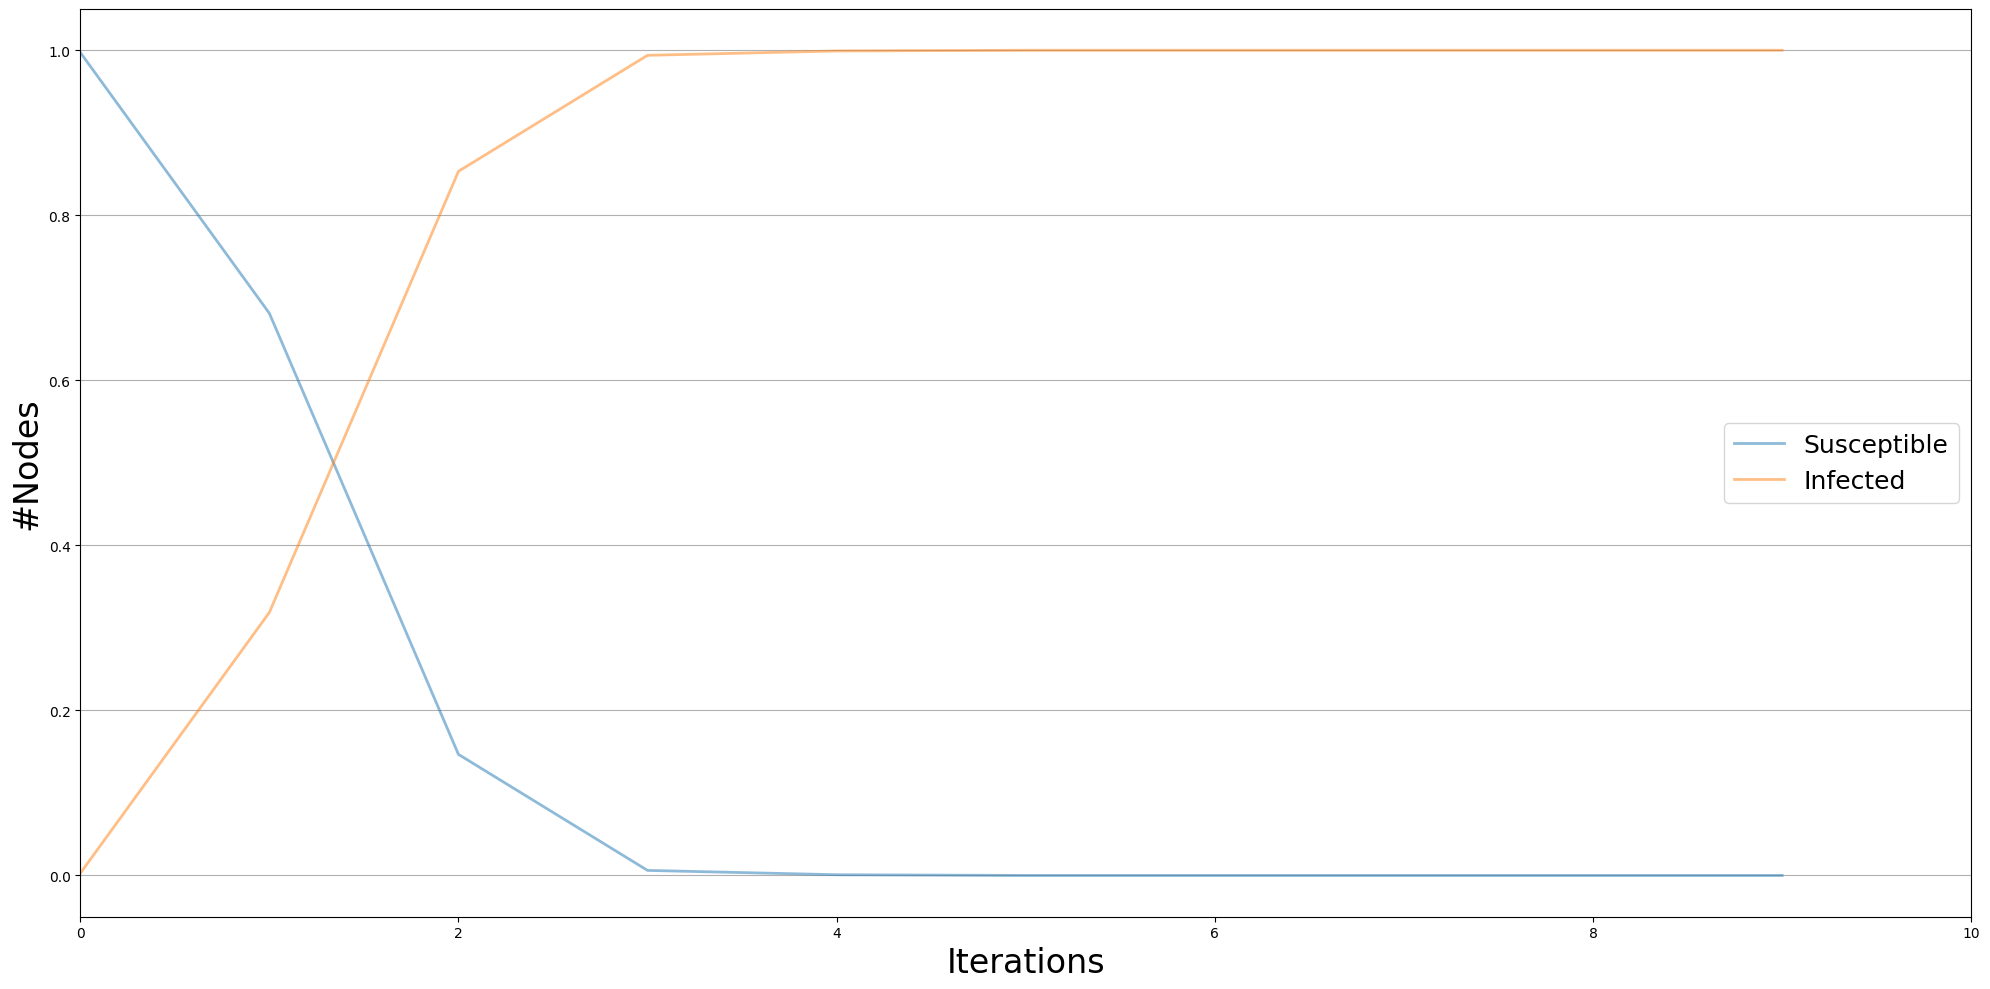

Iteration: 0    Number infected: 3    (0.0026200873362445414)
Iteration: 1    Number infected: 365    (0.31877729257641924)
Iteration: 2    Number infected: 977    (0.8532751091703057)
Iteration: 3    Number infected: 1138    (0.993886462882096)
Iteration: 4    Number infected: 1144    (0.9991266375545852)
Iteration: 5    Number infected: 1145    (1.0)
Threshold met = True after 5 iterations from the initial iteration


In [8]:
#CODE:
# ËøêË°å
# ÈÄâÁÇπ
betweenness_centrality = sorted(
    [(node[0], node[1]) for node in nx.betweenness_centrality(lcc_subgraph).items()],
    key=operator.itemgetter(1), 
    reverse=True
)
initial_node_list = closeness_centrality[:3] + betweenness_centrality[:2]

# ‰º†Êí≠
network = lcc_subgraph
information_spreading_rate = 1
number_of_iterations = 10
initial_infected_node = [node[0] for node in initial_node_list]
eva_threshold = 1.0

model, interations = runSIModelOnANetwork(
    network,
    information_spreading_rate,
    number_of_iterations,
    initial_infected=initial_infected_node
)
evaluateModel(
    network,
    model,
    interations,
    eva_threshold
)